In [1]:
library(MASS)
library(mclust)
library(ggplot2)
library(AdaptGauss)

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar



# Muestra galaxias tempel_limpio

In [2]:
g<-read.table("../../tempel_Mr.dat",sep="")
#"id","al","del","z","mr","mg","rabs","gabs"

In [3]:
rma=subset(g$V7, g$V8 > -27. & g$V8 < -15.)
gma=subset(g$V8, g$V8 > -27. & g$V8 < -15.)

In [4]:
c = gma - rma
color <- subset(c, c > 0. & c < 1.1)
rr <- subset(rma, c > 0. & c < 1.1)
anyNA(color)

[1] FALSE

# Muestra galaxias tempel_limpio_full (r, g, u)

In [5]:
#mdl<-read.table("../../tempel_model_abs.dat",sep="")
#iline,ggalID,objID,zdist,al,del,rm,gm,um,rabs,gabs,uabs
mdl<-read.table("../../tempel_limpio_full.dat",sep="")
#ggalID,ra,dec,zCMB,rm,gm,um,rabs,gabs,uabs,pr50r,pr90r

In [6]:
#r=mdl$V10
#g=mdl$V11
#u=mdl$V12
rap=mdl$V5
uap=mdl$V7
rr=mdl$V8
gg=mdl$V9
uu=mdl$V10

In [7]:
anyNA(rr); anyNA(gg); anyNA(uu)
length(rr)
range(uap)
range(rap)

[1] FALSE

[1] FALSE

[1] FALSE

[1] 557559

[1] -9999.32966    31.49089

[1]  9.446938 17.767403

In [8]:
r=subset(rr, uap > 10. & uap < 25.)
g=subset(gg, uap > 10. & uap < 25.)
u=subset(uu, uap > 10. & uap < 25.)

In [9]:
range(u); range(r)
length(r)

[1] -25.47440   1.30921

[1] -24.757484  -5.657943

[1] 557320

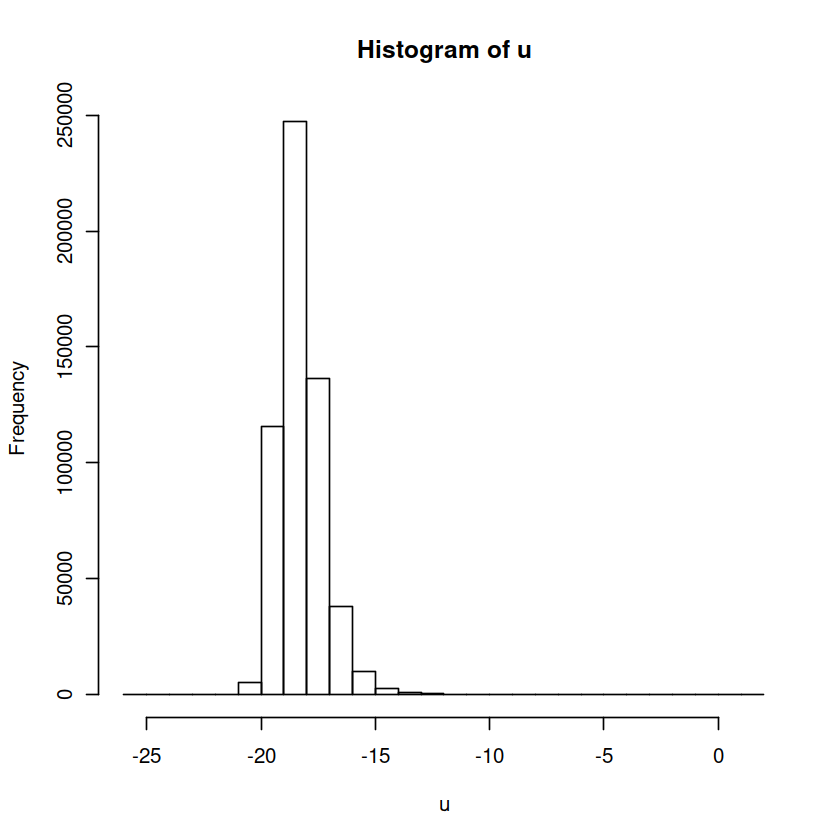

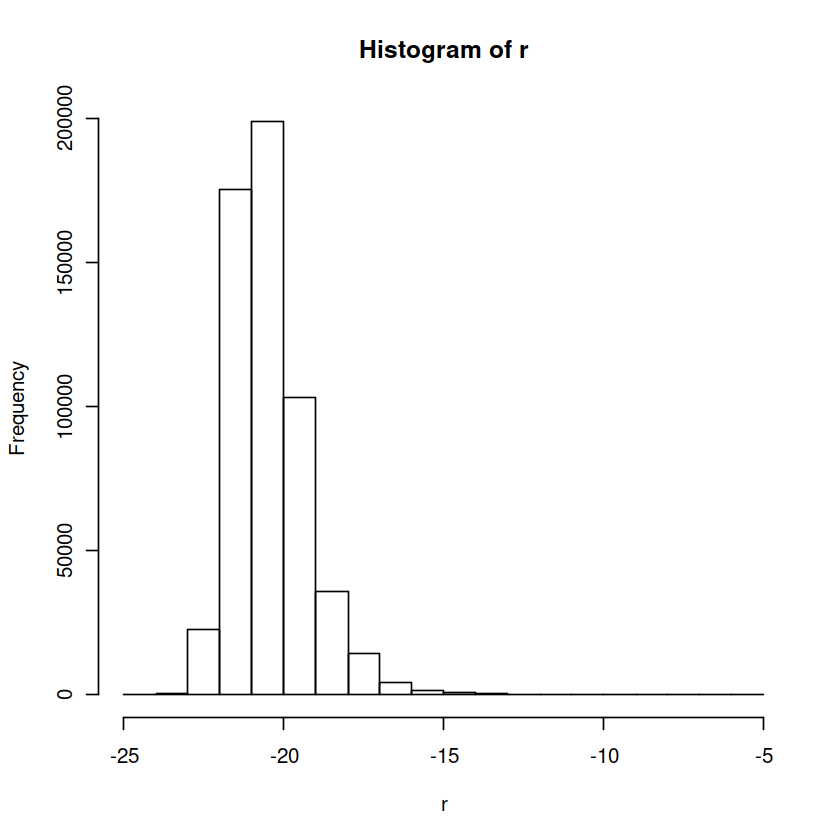

In [10]:
hist(u); hist(r)

In [11]:
color_1=u-r
anyNA(color_1)
range(color_1)

[1] FALSE

[1] -2.632517 14.394611

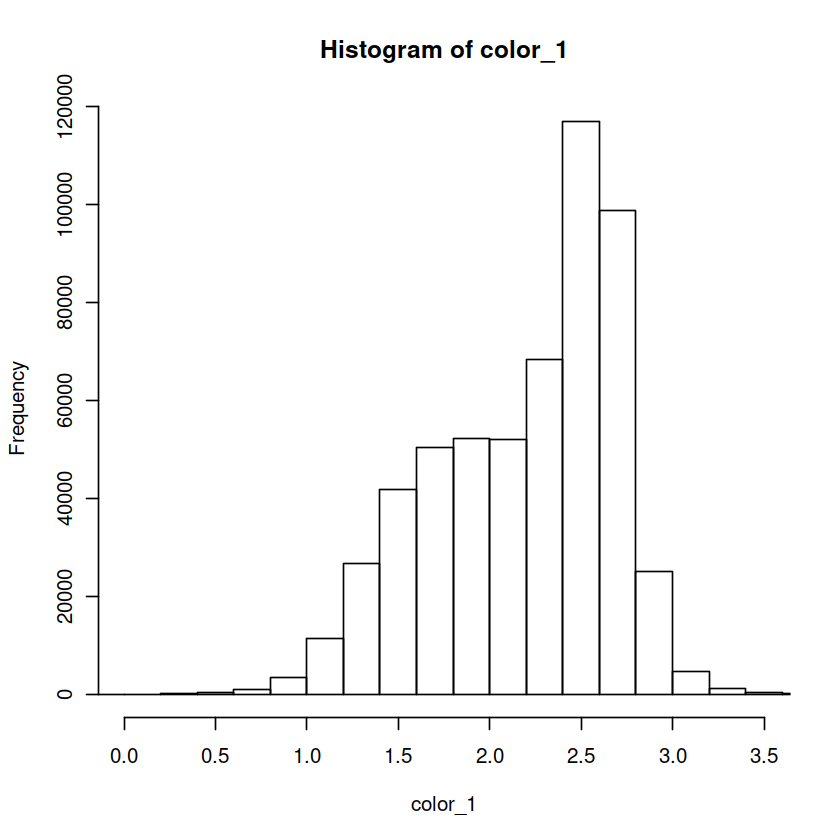

In [12]:
hist(color_1,xlim=c(0,3.5),breaks=100)

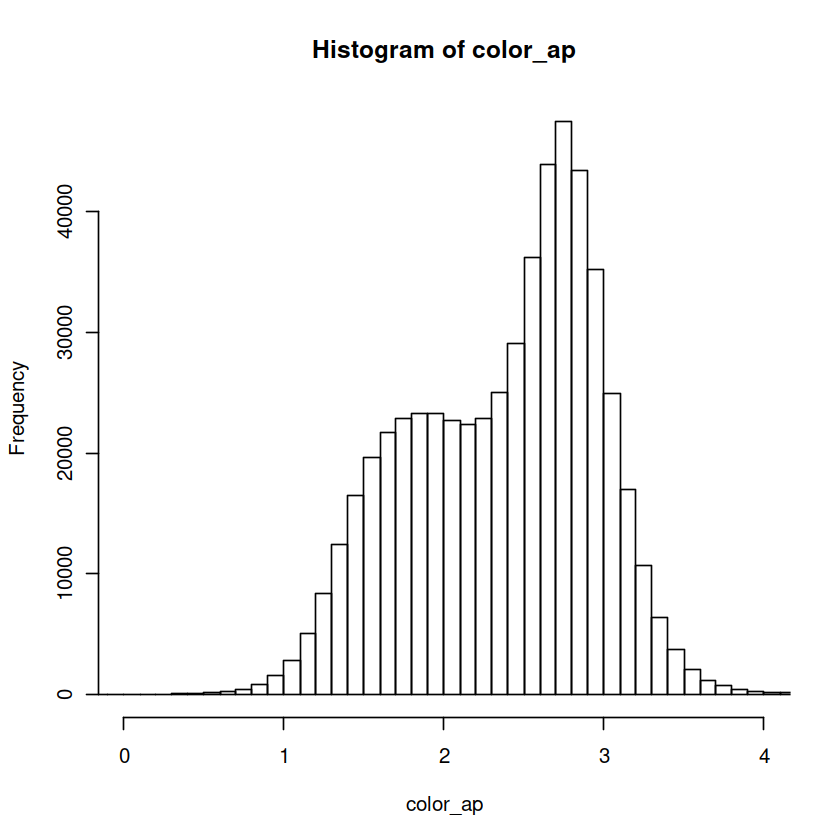

In [13]:
color_ap=uap-rap
hist(color_ap,breaks=100000,xlim=c(0,4))

[1] 557320

[1] 555591

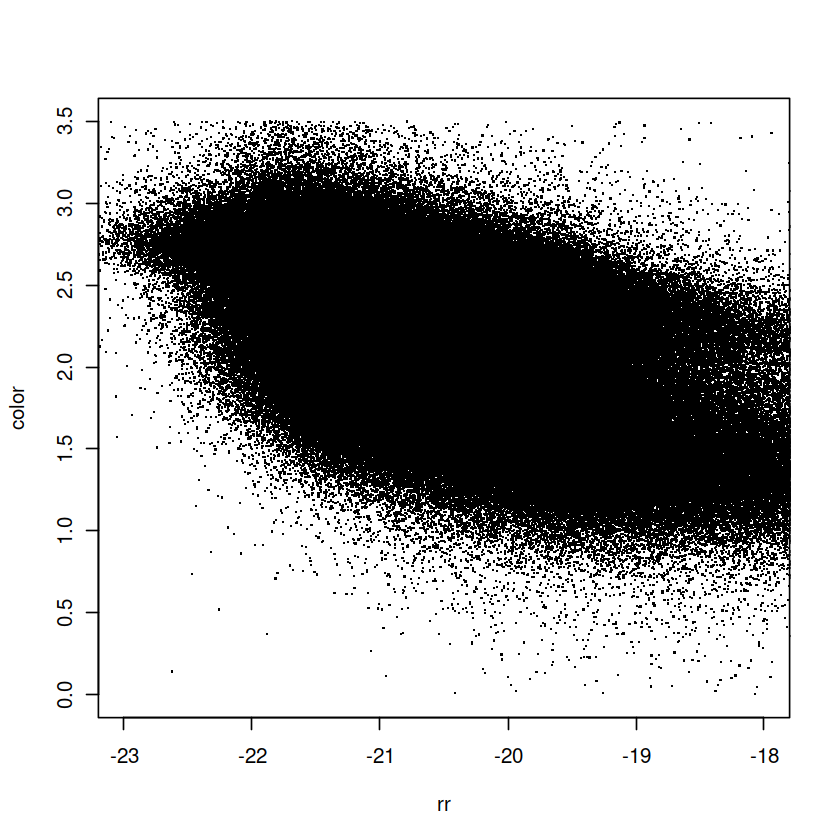

In [14]:
color=subset(color_1,color_1<3.5 & color_1> 0.0)
rr=subset(r,color_1<3.5 & color_1> 0.0)
length(color_1)
length(color)
plot(rr,color,xlim=c(-23,-18),ylim=c(0,3.5),pch='.')

## Radios petro 50 y 90

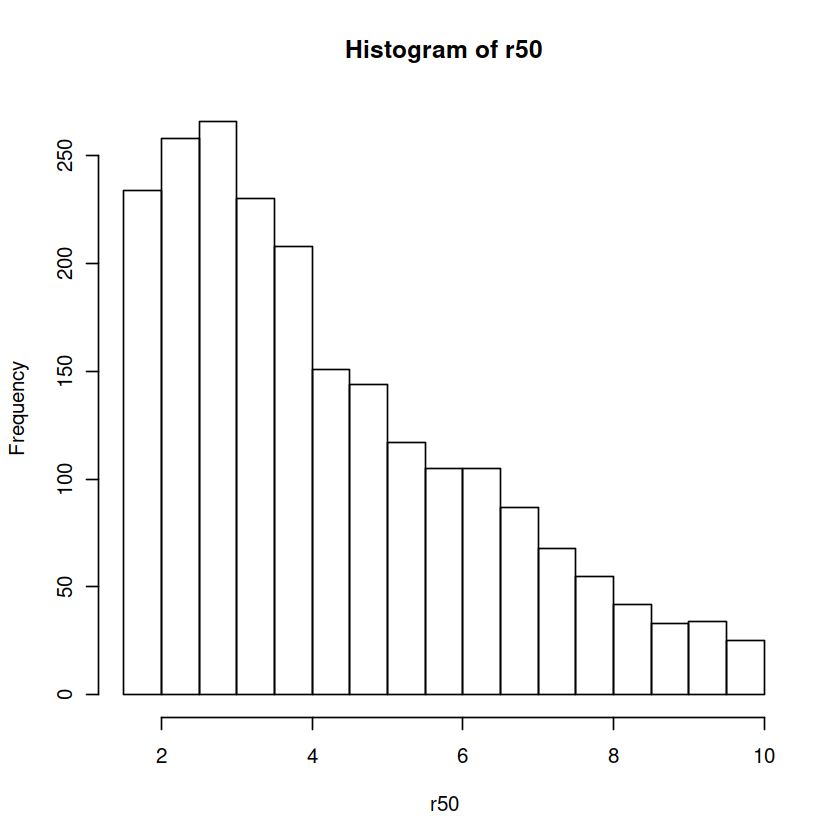

[1] 0.1795566 6.3193143

[1] 1.500823 9.998746

[1] 1.500307 9.912207

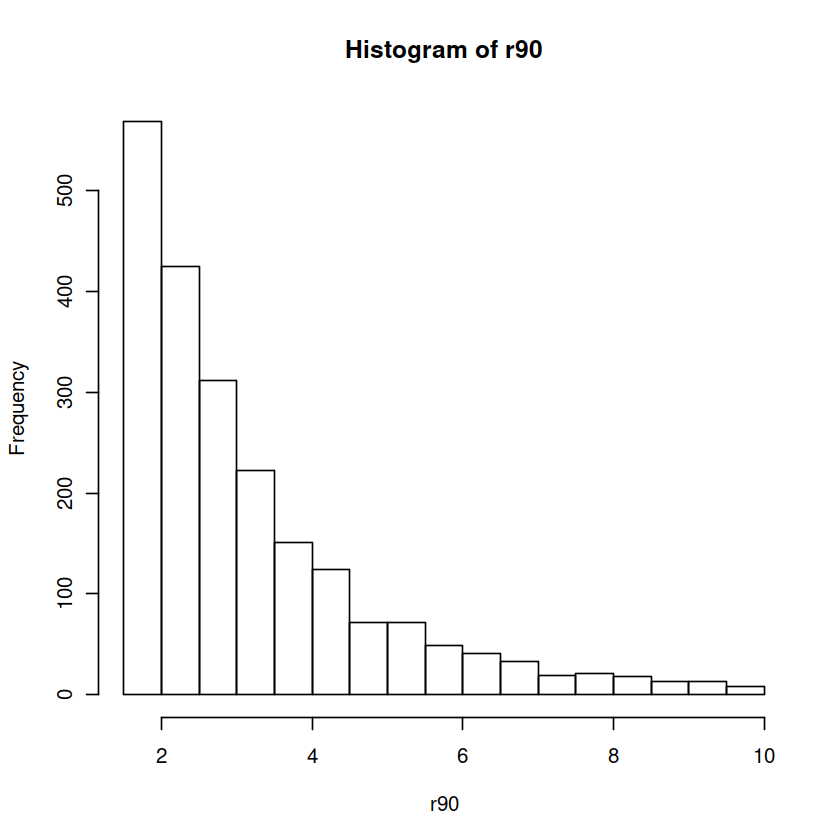

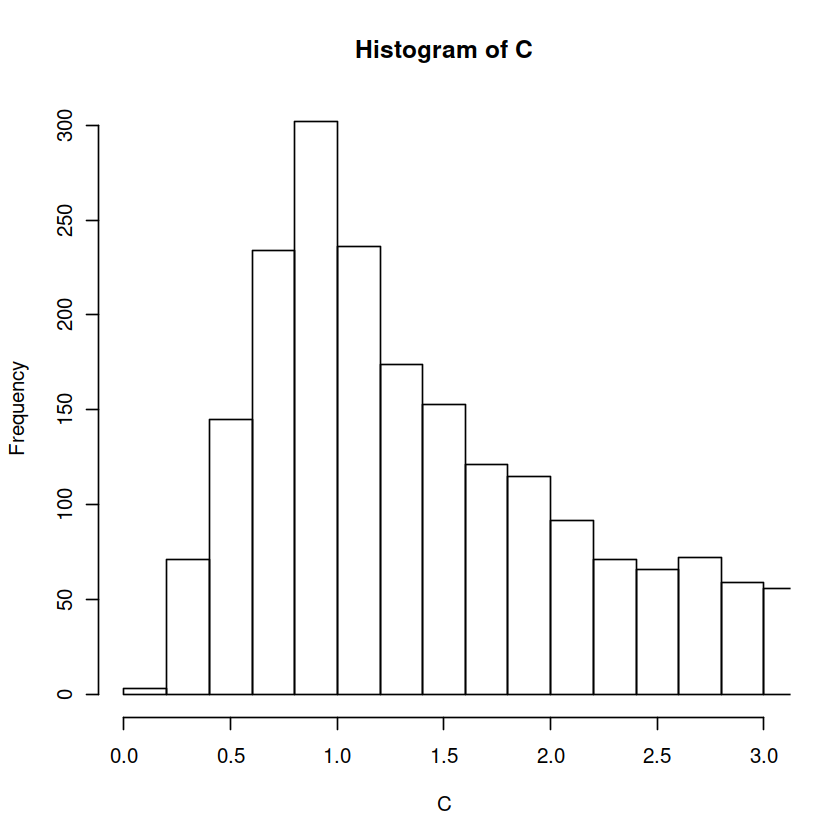

In [15]:
r50=subset(mdl$V11,mdl$V11>1.5 & mdl$V12>1.5 & mdl$V11<10. & mdl$V12<10.)
r90=subset(mdl$V12,mdl$V11>1.5 & mdl$V12>1.5 & mdl$V11<10. & mdl$V12<10.)
C=r50/r90
hist(r50)
hist(r90)
range(C)
range(r50)
range(r90)
hist(C,xlim=c(0,3),breaks=30)

### Bines en Magnitud Absoluta

In [16]:
bin=seq(-22.7,-18.2,0.5)
bin
length(bin)

[1] -22.7 -22.2 -21.7 -21.2 -20.7 -20.2 -19.7 -19.2 -18.7 -18.2

[1] 10

#### Range Mabs r-band

In [17]:
color0= subset(color, rr>= -23. & rr< -18.)
color1= subset(color, rr>=bin[1] & rr< bin[2])
color2= subset(color, rr>=bin[2] & rr< bin[3])
color3= subset(color, rr>=bin[3] & rr< bin[4])
color4= subset(color, rr>=bin[4] & rr< bin[5])
color5= subset(color, rr>=bin[5] & rr< bin[6])
color6= subset(color, rr>=bin[6] & rr< bin[7])
color7= subset(color, rr>=bin[7] & rr< bin[8])
color8= subset(color, rr>=bin[8] & rr< bin[9])
color9= subset(color, rr>=bin[9] & rr< bin[10])
#color10= subset(color, rr>=bin[10] & rr< bin[11])
#color11= subset(color, rr>=bin[11] & rr< bin[12])
#color12= subset(color, rr>=bin[12] & rr< bin[13])
#color13= subset(color, rr>=bin[13] & rr< bin[14])
#color14= subset(color, rr>=bin[14] & rr< bin[15])
#color15= subset(color, rr>=bin[15] & rr< bin[16])

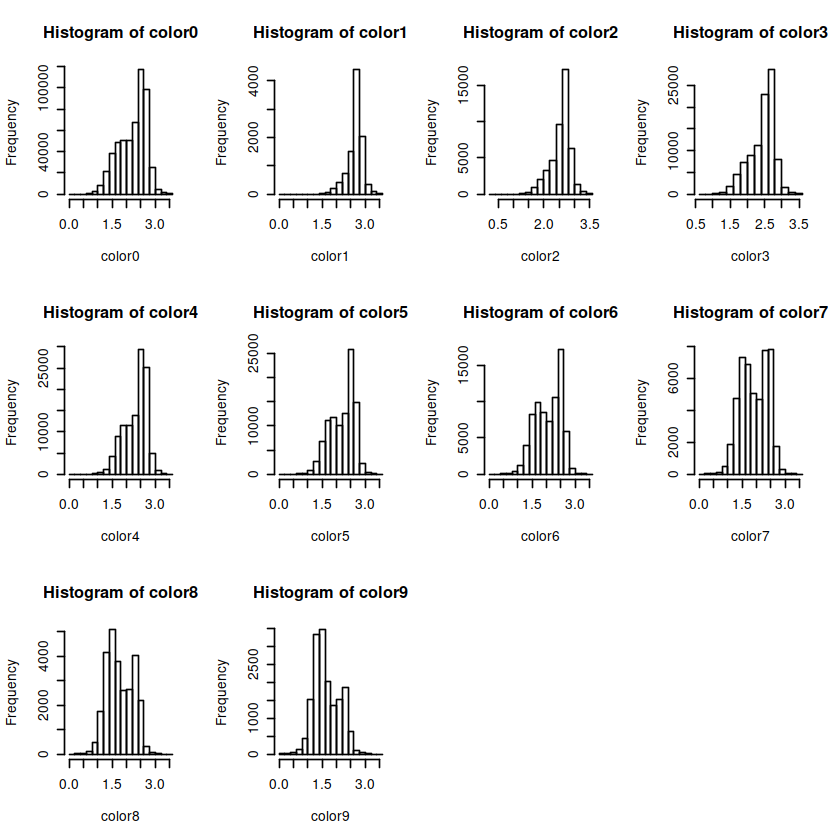

In [18]:
par(mfrow=c(3,4))
hist(color0)
hist(color1)
hist(color2)
hist(color3)
hist(color4)
hist(color5)
hist(color6)
hist(color7)
hist(color8)
hist(color9)
#hist(color10)

# GMM (2 Gaussians)

In [19]:
gmm <- densityMclust(color0,G=2,initialization = set.seed(0),modelNames = "V") #"E"

In [20]:
summary(gmm, parameters = TRUE)

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood      n df       BIC       ICL
      -301063.6 534242  5 -602193.1 -779340.7

Mixing probabilities:
        1         2 
0.5902272 0.4097728 

Means:
       1        2 
1.966049 2.587429 

Variances:
         1          2 
0.20693625 0.02569377 

In [21]:
#models univariate mixture
#"E"equal variance (one-dimensional)
#"V"variable/unqual variance (one-dimensional)

gmm$modelName

[1] "V"

In [22]:
gmm1 <- densityMclust(color1,G=2,initialization = set.seed(0))
gmm2 <- densityMclust(color2,G=2,initialization = set.seed(0))
gmm3 <- densityMclust(color3,G=2,initialization = set.seed(0))
gmm4 <- densityMclust(color4,G=2,initialization = set.seed(0))
gmm5 <- densityMclust(color5,G=2,initialization = set.seed(0))
gmm6 <- densityMclust(color6,G=2,initialization = set.seed(0))
gmm7 <- densityMclust(color7,G=2,initialization = set.seed(0))
gmm8 <- densityMclust(color8,G=2,initialization = set.seed(0))
gmm9 <- densityMclust(color9,G=2,initialization = set.seed(0))

#gmm10 <- densityMclust(color10,G=2,initialization = set.seed(0))
#gmm11 <- densityMclust(color11,G=2,initialization = set.seed(0))
#gmm12 <- densityMclust(color12,G=2,initialization = set.seed(0))
#gmm13 <- densityMclust(color13,G=2,initialization = set.seed(0))
#gmm14 <- densityMclust(color14,G=2,initialization = set.seed(0))
#gmm15 <- densityMclust(color15,G=2,initialization = set.seed(0))

In [23]:
range(color9)
anyNA(color9)
summary(gmm9, parameters = TRUE)

[1] 0.02412228 3.49073627

[1] FALSE

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood     n df       BIC       ICL
      -8745.772 16470  5 -17540.09 -19312.15

Mixing probabilities:
        1         2 
0.7158676 0.2841324 

Means:
       1        2 
1.423191 2.220995 

Variances:
         1          2 
0.07356599 0.04674436 

In [24]:
#gmm$classification #--> a que gassiana pertenece

# Plot

In [25]:
plot_col <- function(xx,gaus,a,bin1,bin2){
    
    br <- seq(min(xx), max(xx), length = 100)
    #plot(gaus, what = "density", data = xx, breaks = br,xlab="",xaxt='n',yaxt='n')
    plot(gaus, what = "density",  breaks = br,xlab="",lty=1)
    h=hist(xx,plot=FALSE)
    points(h$mids,h$density,type="s", col = "black")

    x <- seq(min(xx)-diff(range(xx))/10, max(xx)+diff(range(xx))/10, length = 200)
    cdens <- predict(gaus, x, what = "cdens")
    cdens <- t(apply(cdens, 1, function(d) d*gaus$parameters$pro))
    matplot(x, cdens, type = "l", lwd = 1, add = TRUE, lty = 2:2, col = c("red","blue"),xaxt='n',yaxt='n')

    m1=gaus$parameters$mean[1]; sd1=sqrt(gaus$parameters$variance$sigmasq[1]); p1=gaus$parameters$pro[1]
    m2=gaus$parameters$mean[2]; sd2=sqrt(gaus$parameters$variance$sigmasq[2]); p2=gaus$parameters$pro[2]

    #inteseccion de dos gaussianas
    intersec=Intersect2Mixtures(m1,sd1,p1,m2,sd2,p2)
    ll=intersec$CutX
    abline(v=ll,col='magenta')

    legend("topleft", legend=c(a), cex=0.7,bty="n")

    intersect=round(ll,digits=4)
    dd=data.frame(bin1,bin2,intersect)
                                
    xtick<-seq(0, 10, by=5)
    axis(side=1, at=c(0.,0.2,0.4,0.6,0.8,1.0,1.2), labels = FALSE)
                 
    return(dd)
}


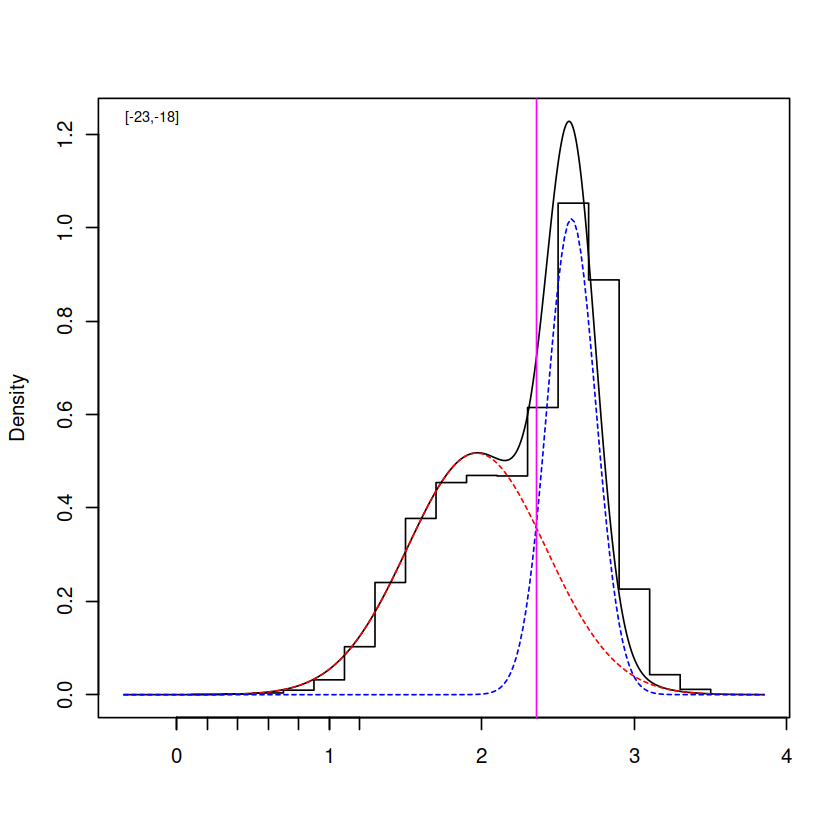

In [26]:
#cairo_ps("color_tempel_gmm_total.eps")
a1=plot_col(color,gmm,"[-23,-18]",-23,-17)
#dev.off()

In [27]:
#cairo_ps("color_tempel_gmm.eps")

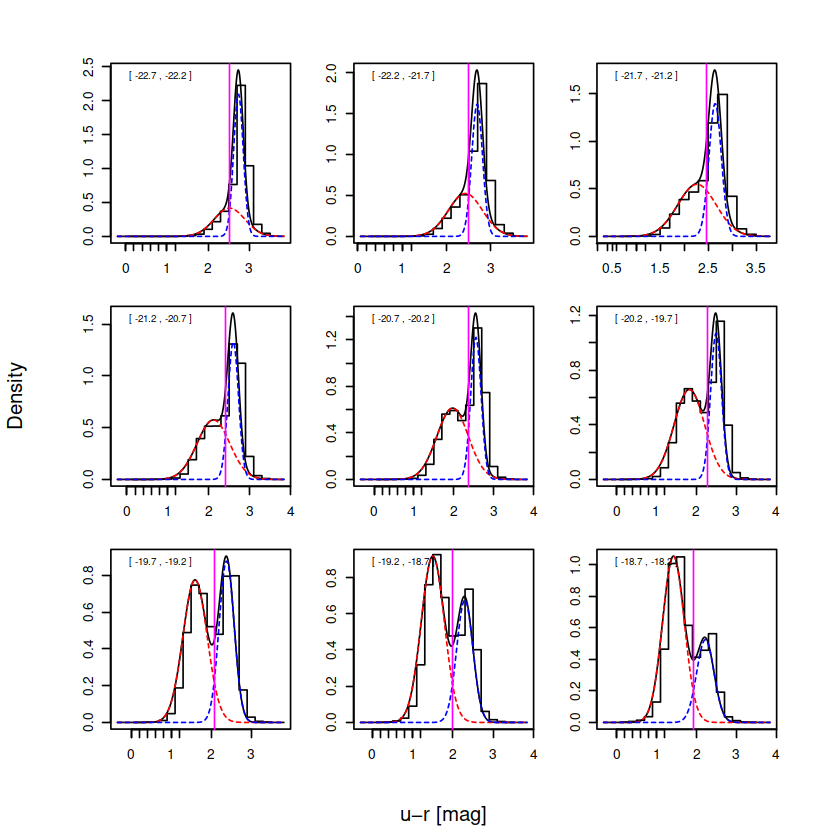

In [28]:
#cairo_ps("color_tempel_gmm_ur.eps")
par(mfrow=c(3,3))
par(mar = c(2, 2, 2, 2))
par(oma = c(5, 5, 2, 2))
#xx=color1
#gaus=gmm1

a2=plot_col(color1,gmm1,as.character(paste("[",bin[1],",",bin[2],"]")),bin[1],bin[2])
a3=plot_col(color2,gmm2,as.character(paste("[",bin[2],",",bin[3],"]")),bin[2],bin[3])
a4=plot_col(color3,gmm3,as.character(paste("[",bin[3],",",bin[4],"]")),bin[3],bin[4])
a5=plot_col(color4,gmm4,as.character(paste("[",bin[4],",",bin[5],"]")),bin[4],bin[5])
a6=plot_col(color5,gmm5,as.character(paste("[",bin[5],",",bin[6],"]")),bin[5],bin[6])
a7=plot_col(color6,gmm6,as.character(paste("[",bin[6],",",bin[7],"]")),bin[6],bin[7])
a8=plot_col(color7,gmm7,as.character(paste("[",bin[7],",",bin[8],"]")),bin[7],bin[8])
a9=plot_col(color8,gmm8,as.character(paste("[",bin[8],",",bin[9],"]")),bin[8],bin[9])
a10=plot_col(color9,gmm9,as.character(paste("[",bin[9],",",bin[10],"]")),bin[9],bin[10])

#a11=plot_col(color10,gmm10,as.character(paste("[",bin[10],",",bin[11],"]")),bin[10],bin[11])
#a12=plot_col(color11,gmm11,as.character(paste("[",bin[11],",",bin[12],"]")),bin[11],bin[12])
#a13=plot_col(color12,gmm12,as.character(paste("[",bin[12],",",bin[13],"]")),bin[12],bin[13])
#a14=plot_col(color13,gmm13,as.character(paste("[",bin[13],",",bin[14],"]")),bin[13],bin[14])
#a15=plot_col(color14,gmm14,as.character(paste("[",bin[14],",",bin[15],"]")),bin[14],bin[15])
#a16=plot_col(color15,gmm15,as.character(paste("[",bin[15],",",bin[16],"]")),bin[15],bin[16])


mtext(expression(paste(u,'\u2212',r," ","[mag]")), side = 1, cex = 1, line = 3.2, col = "black", outer = TRUE)
mtext(expression(paste("Density")), side = 2, cex = 1, line = 3.2, col = "black", outer = TRUE)
#dev.off()

In [29]:
m=rbind(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10)#,a11,a12)#,a13,a14,a15,a16)
m
m[1,3]

bin1,bin2,intersect
<dbl>,<dbl>,<dbl>
-23.0,-17.0,2.3557
-22.7,-22.2,2.5238
-22.2,-21.7,2.5034
-21.7,-21.2,2.4605
-21.2,-20.7,2.4104
-20.7,-20.2,2.3570
-20.2,-19.7,2.2828
-19.7,-19.2,2.0765
-19.2,-18.7,1.9882


[1] 2.3557

# Color - Magnitud

In [30]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [31]:
#M_r1<-mdl$V10
#M_g1<-mdl$V11
#M_u1<-mdl$V12
M_r1<-mdl$V8
M_g1<-mdl$V9
M_u1<-mdl$V10

In [32]:
#M_r<-subset(M_r1,M_r1 >=-23. & M_r1 <= -17.)
#M_g<-subset(M_g1,M_r1 >=-23. & M_r1 <= -17.)
#length(M_r)

In [33]:
col1= M_u1-M_r1

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Warning message in bkde2D(l[c("Mag", "col")], bandwidth = c(0.05, 0.05), gridsize = c(100, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”


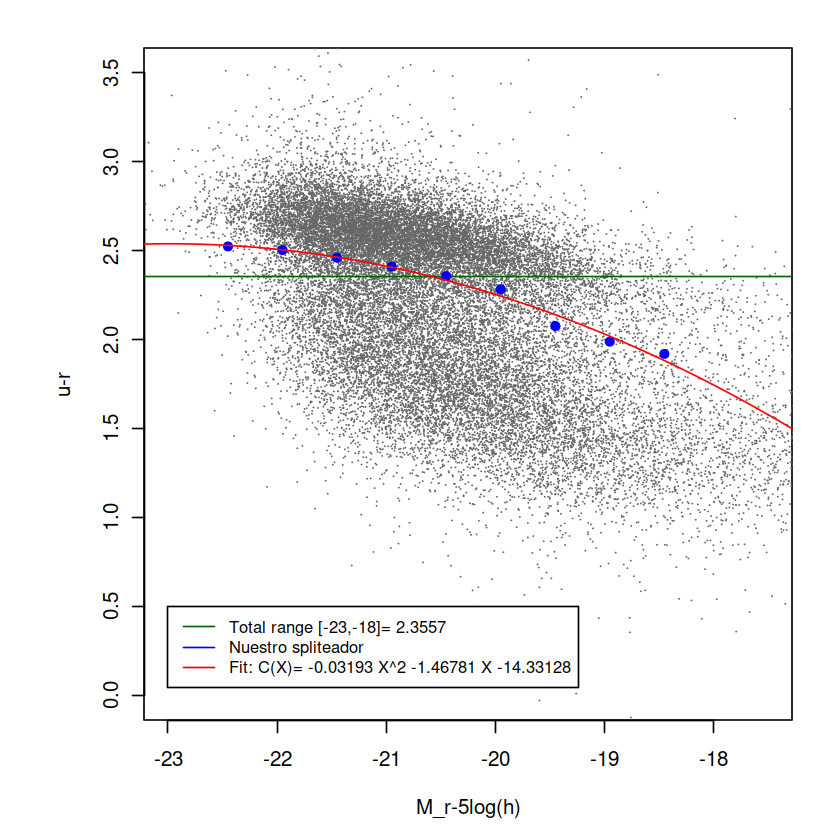

In [34]:
#cairo_ps("passive_cut_ur.eps")
par(mfrow=c(1,1))
par(mar=c(5,5,1,1))  #c(b,l,t,r)
par(oma=c(0,1,1,1))  #c(b,l,t,r)

df=data.frame(M_r1,col1)
new_df=sample_frac(df,0.05)
M_g_n <- new_df[,1]
color1_n <- new_df[,2]

#labx=TeX(' $\\M_r-5 \\, \\log{(h)}}\\]$')
labx="M_r-5log(h)"
plot(NA,xlim=c(-23,-17.5),ylim=c(0.0,3.5),xlab=labx,ylab='u-r',main='')
points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

#---------------------
##--Display as a contour map:
#---------------------
require(KernSmooth)
l<-data.frame(M_r1,col1)
colnames(l)[c(1,2)] <-c("Mag", "col")
est <- bkde2D(l[c("Mag", "col")], bandwidth=c(0.05, 0.05), gridsize=c(100, 100))
#with(est, contour(x1, x2, fhat, drawlabels=TRUE, add=TRUE, col="black",labcex=1))


#Ajuste Lineal Blanton+07
x=seq(-24,-16,0.1)
y=0.8-0.03*(x +20)
#points(x ,y,type='l',col='magenta')


#Total range
abline(h=m[1,3],lw=1, lty=1,col='darkgreen')

xx=(m[1]-m[2])/2.+ m[2]
yy=m[3]
points(xx[-1,],yy[-1,],col="blue",pch=16)

#Ajuste cuadratico
#p=poly(xx,yy, degree = 2)
#modelo_p <- lm(p)
xseq=seq(-24,-17,0.1)
model <- lm(yy[-1,] ~ poly(xx[-1,],2))
coef1 <- lm(yy[-1,] ~ xx[-1,] + I(xx[-1,]^2))$coef
lines(xseq,  coef1[3]*xseq^2+ coef1[2]*xseq+ coef1[1], col='red')
#lines(xseq,  -0.02076*xseq^2 -1.00785*xseq -9.61313, col='orange')

legend(-23.0, 0.5,
       legend=c(paste("Total range [-23,-18]=",m[1,3]),
                "Nuestro spliteador",
                paste("Fit: C(X)=",round(coef1[3],5),"X^2",round(coef1[2],5),"X",round(coef1[1],5))),
       col=c("darkgreen", "blue","red","orange"), lty=1, cex=0.8)

#dev.off()

In [35]:
round(coef1[3],5)
round(coef1[2],5)
round(coef1[1],5)

I(xx[-1, ]^2) 
     -0.03193

xx[-1, ] 
-1.46781

(Intercept) 
  -14.33128

# GMM 2D (2 Gaussians) 
### Espacio color-magnitud

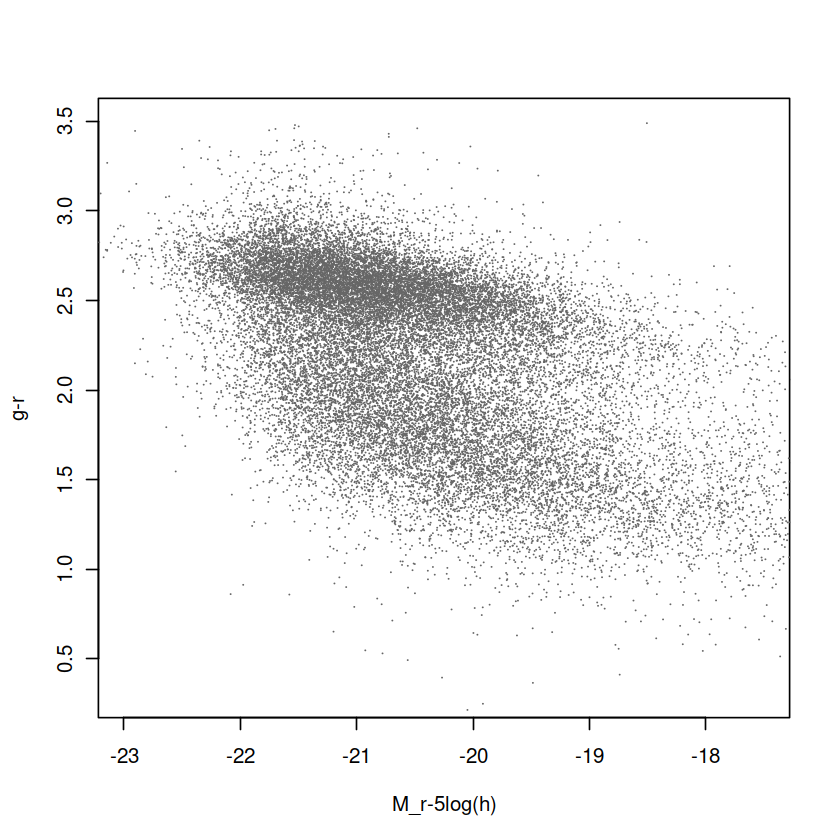

In [36]:
#df=data.frame(M_r,col1) #todo

color <- subset(col1, col1 > 0. & col1 < 3.5)
rr <- subset(M_r1, col1 > 0. & col1 < 3.5)
df=data.frame(rr,color)

new_df=sample_frac(df,0.05)
M_g_n <- new_df[,1]
color1_n <- new_df[,2]

#labx=TeX(' $\\M_r-5 \\, \\log{(h)}}\\]$')
labx="M_r-5log(h)"
plot(NA,xlim=c(-23,-17.5),ylim=c(0.3,3.5),xlab=labx,ylab='g-r',main='')
points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

In [37]:
gmm_2d <- densityMclust(df,G=2,initialization = set.seed(0), modelNames="VVV")

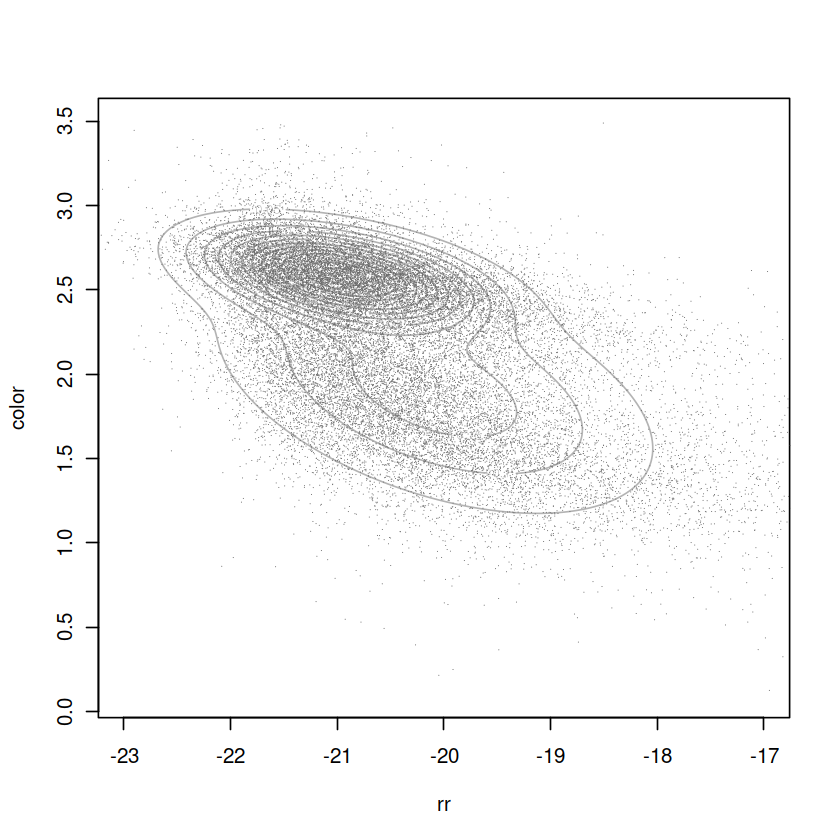

In [38]:
#plot(gmm, what = "density", data = new_df, pch = '.', points.cex = 0.005,xlim=c(-23,-17.5),ylim=c(0.1,1.1))
plot(gmm_2d , what = "density",xlim=c(-23,-17),ylim=c(0.1,3.5))#, type = "hdr")
points(M_g_n,color1_n,pch=16,cex=0.01,col='grey40')

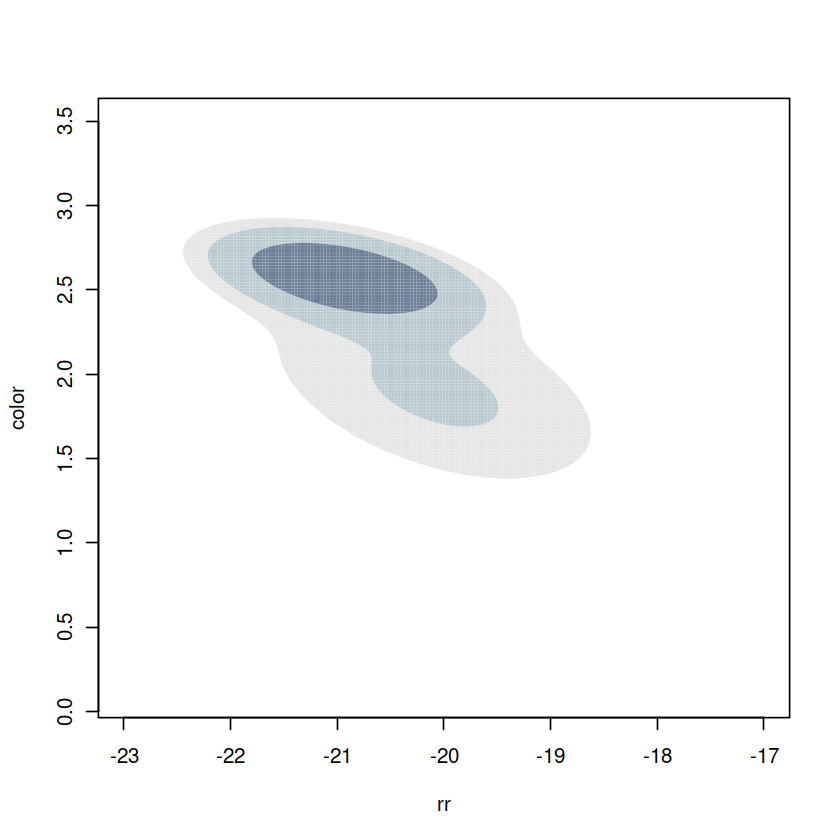

In [39]:
plot(gmm_2d , what = "density",xlim=c(-23,-17),ylim=c(0.1,3.5), type = "hdr")

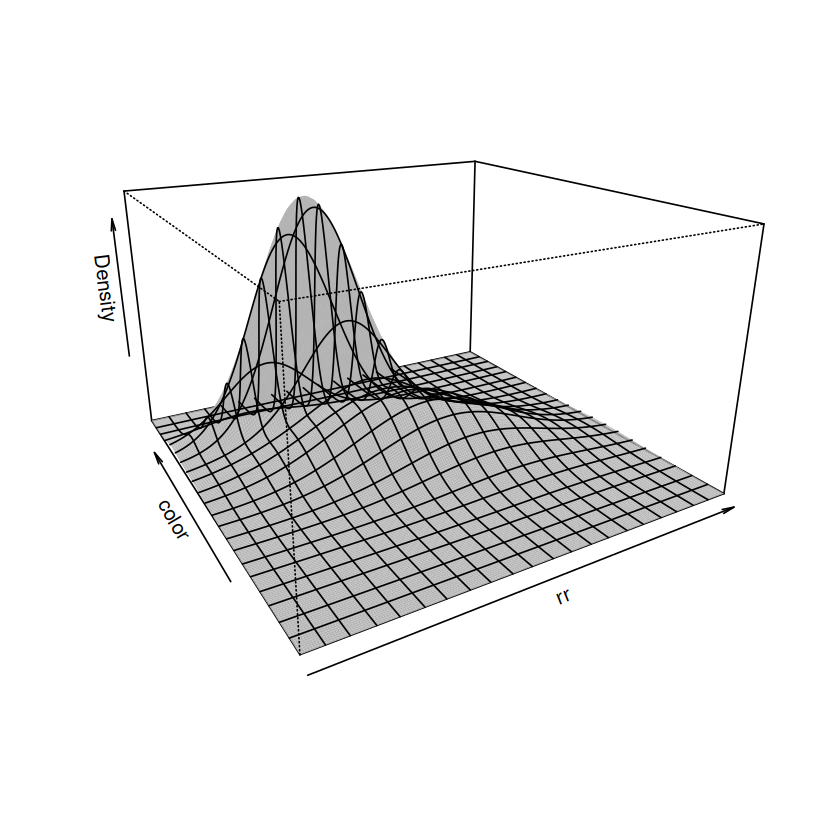

In [40]:
plot(gmm_2d , what = "density", type = "persp",xlim=c(-23,-17),ylim=c(0.1,3.5))

In [41]:
summary(gmm_2d)

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 2
components: 

 log-likelihood      n df      BIC      ICL
       -1072266 555591 11 -2144678 -2286912

In [42]:
#gmm_2d$classification
length(gmm_2d$classification)

[1] 555591

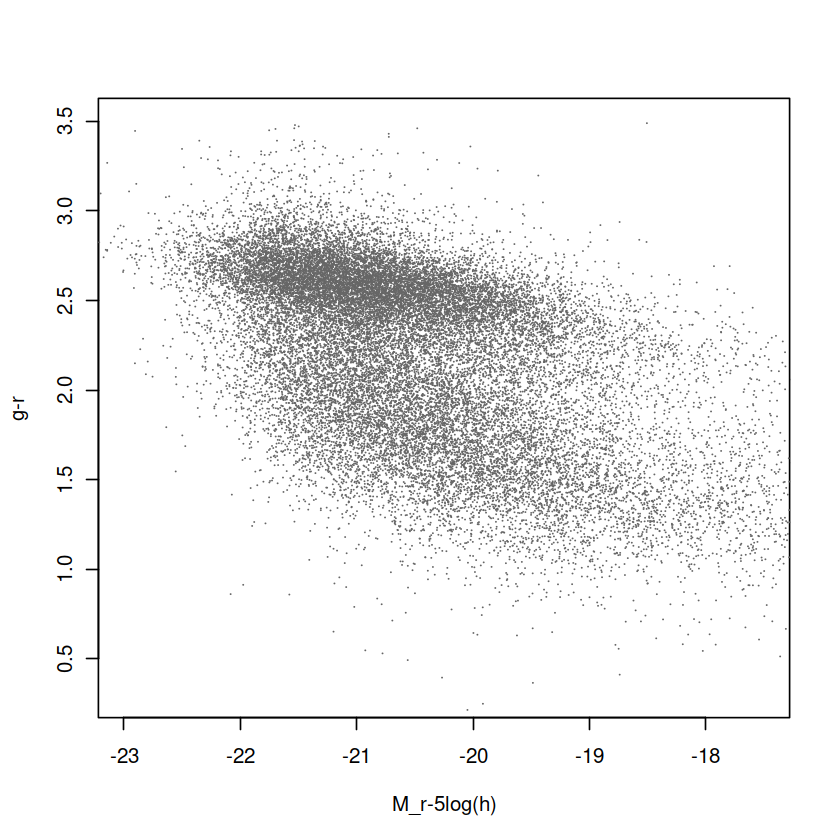

In [43]:
plot(NA,xlim=c(-23,-17.5),ylim=c(0.3,3.5),xlab=labx,ylab='g-r',main='')

points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

In [44]:
gmm_2d$parameters

rr,-20.957382,-20.080141
color,2.587398,1.900429


In [45]:
#Matrix whose [i,k]th entry is the probability that observation i in the test data belongs to the kth class.
#gmm_2d$z


In [46]:
#The number of estimated parameters.
#gmm_2d$df

In [ ]:
mod5 <- Mclust(df,G=2)

In [ ]:
mclust2Dplot(data = df, what = "classification", 
             #identify = TRUE,
             parameters = mod5$parameters, z = mod5$z)

In [ ]:
surfacePlot(data = df, what = "density", type = "contour",
            parameters = mod5$parameters)

In [ ]:
surfacePlot(data = df, , what = "uncertainty", type = "image",
            parameters = mod5$parameters)#,  transformation = "log")